In [12]:
import pandas as pd
df = pd.read_csv('dot1_1022.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format



In [3]:
# Replaced Integers 1 & 2 with strings 'Export' & 'Import', respectively.

df['TRDTYPE'] = df['TRDTYPE'].map({
    1 : 'Export',
    2 : 'Import',
})

In [4]:
# Replaced Integers 1 & 2 with strings 'Domestic' & 'Foreign', respectively.

df['DF'] = df['DF'].map({
    1 : 'Domestic',
    2 : 'Foreign', 
})

In [5]:
# Replaced Integers with respective string values.

df['DISAGMOT'] = df['DISAGMOT'].map({
    1 : 'Vessel',
    3 : 'Air',
    4 : 'USPS', 
    5 : 'Truck',
    6 : 'Rail',
    7 : 'Pipeline',
    8 : 'Other',
    9 : 'FTZ',
})

In [6]:
# Dropped unneeded columns.

df = df[['TRDTYPE', 'USASTATE', 'DEPE', 'DISAGMOT', 
#          'MEXSTATE', 'CANPROV', 'COUNTRY', 
         'VALUE', 'SHIPWT', 'FREIGHT_CHARGES', 'DF', 
#          'CONTCODE', 'MONTH', 'YEAR'
]]

**North American Transborder Freight Data for October 2022**  
* Analyze the shipping of goods via railway
* Build a predictive model for railway shipping
    

[DataSet](https://www.bts.gov/transborder)  
[Codes](https://www.bts.gov/sites/bts.dot.gov/files/docs/browse-statistical-products-and-data/transborder-freight-data/220171/codes-north-american-transborder-freight-raw-data.pdf)  
 



**63% of Goods Shipped Were Exports**  
Trade Type Code (TRDTYPE)

Export    0.626764
Import    0.373236
Name: TRDTYPE, dtype: float64


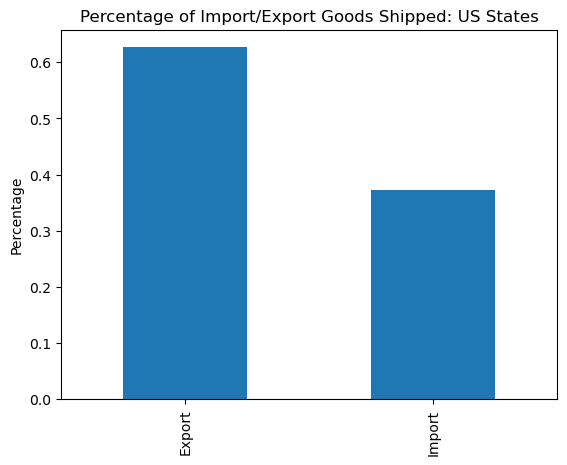

In [41]:
print(df.TRDTYPE.value_counts(normalize=True))
df.TRDTYPE.value_counts(normalize=True).plot(kind='bar', ylabel='Percentage', title='Percentage of Import/Export Goods Shipped: US States')
plt.show()

**Import/Export By US State**

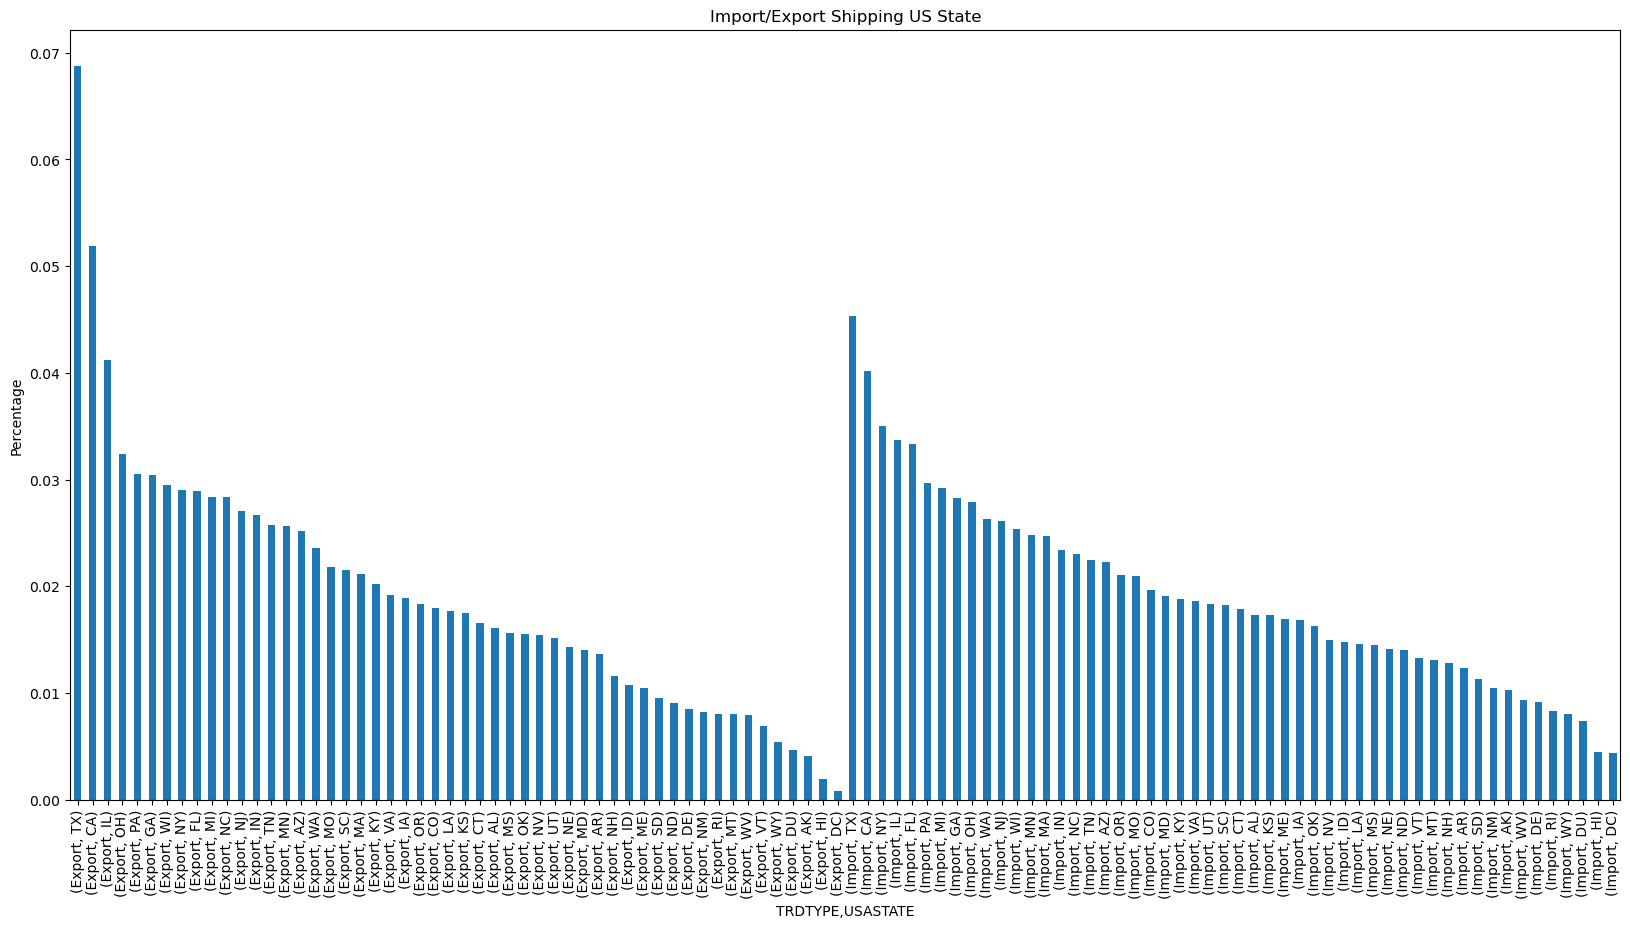

In [7]:
#print(df.groupby('TRDTYPE')['USASTATE'].value_counts(normalize=True))
plt.ylabel('Percentage')
df.groupby('TRDTYPE')['USASTATE'].value_counts(normalize=True).plot(kind='bar', title='Import/Export Shipping US State', figsize=(20,10))
plt.show()


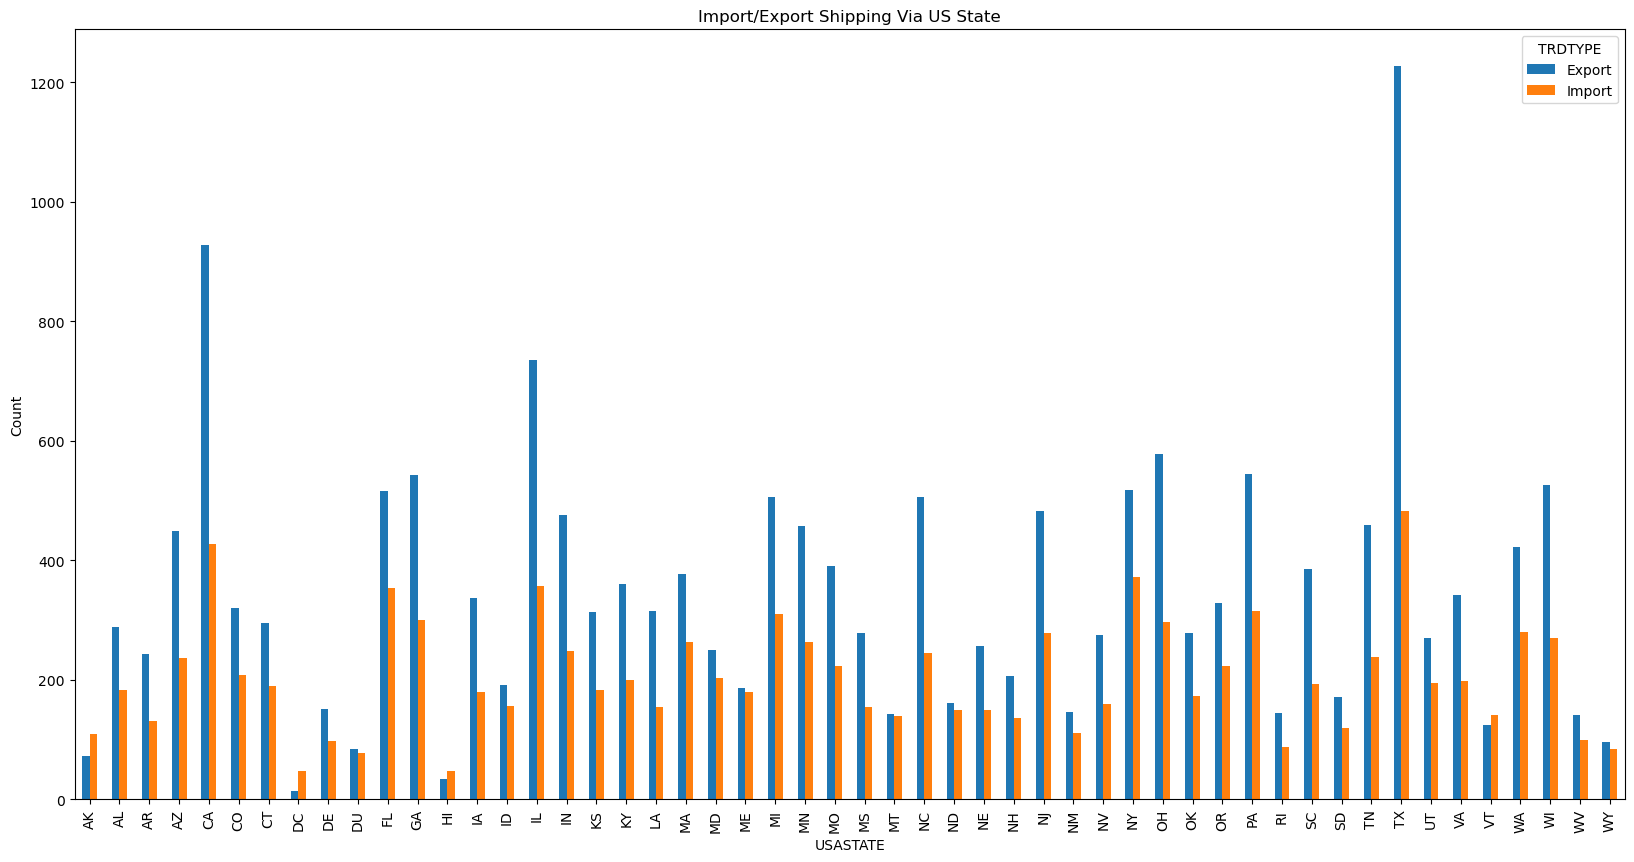

In [8]:
pd.crosstab(df['USASTATE'], df['TRDTYPE']).plot(kind='bar', ylabel='Count', title='Import/Export Shipping US State', figsize=(20,10))
plt.show()

### Percentage of Import/Export By Rail

Import    0.512413
Export    0.487587
Name: TRDTYPE, dtype: float64


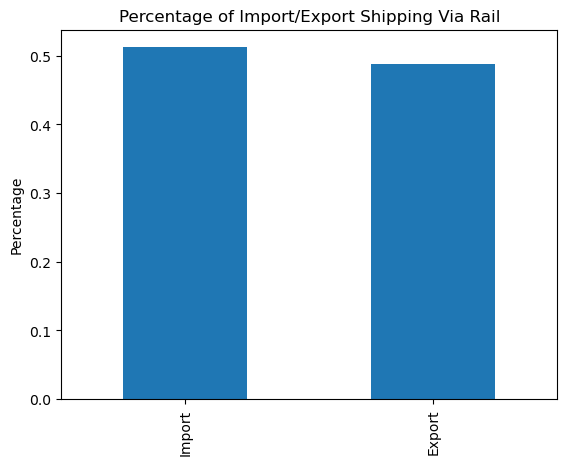

In [43]:
print(df[df.DISAGMOT == 'Rail'].TRDTYPE.value_counts(normalize=True))
plt.ylabel('Percentage')
df[df.DISAGMOT == 'Rail'].TRDTYPE.value_counts(normalize=True).plot(kind='bar', title='Percentage of Import/Export Shipping Via Rail')
plt.show()

Import    2064
Export    1964
Name: TRDTYPE, dtype: int64


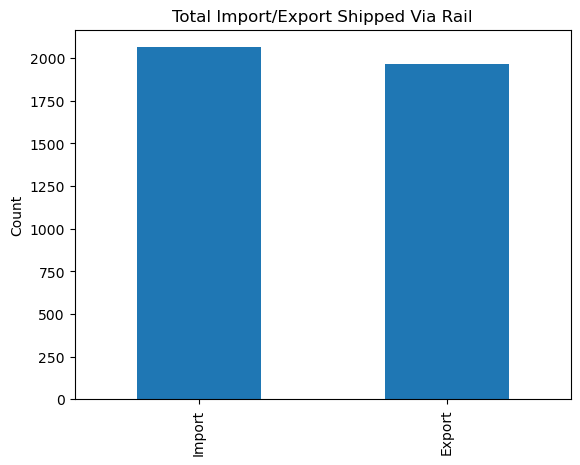

In [44]:
print(df[df.DISAGMOT == 'Rail'].TRDTYPE.value_counts())
df[df.DISAGMOT == 'Rail'].TRDTYPE.value_counts().plot(kind='bar', ylabel='Count', title='Total Import/Export Shipped Via Rail')
plt.show()

## 66% of Goods Shipped Were Domestically Produced
### Domestic/Foreign Code (DF)

Domestic    0.664613
Foreign     0.335387
Name: DF, dtype: float64


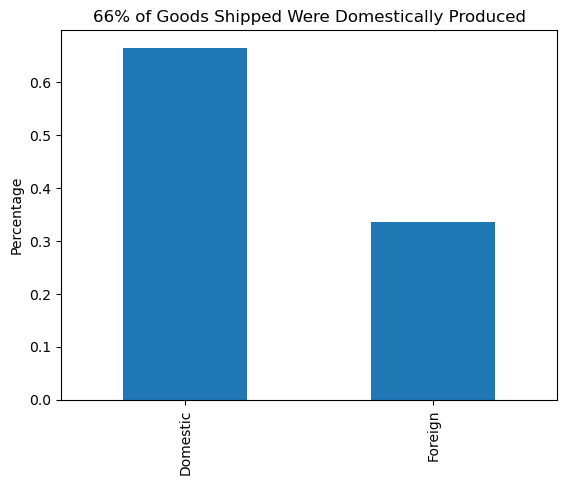

In [45]:
print(df.DF.value_counts(normalize=True))
plt.ylabel('Percentage')
df.DF.value_counts(normalize=True).plot(kind='bar', title='66% of Goods Shipped Were Domestically Produced')
plt.show()

DISAGMOT   Air  Other  Pipeline  Rail  Truck  USPS  Vessel
DF                                                        
Domestic  2047   1277        63  1664   6540    13     262
Foreign   1610    450         1   300   3506     5     116


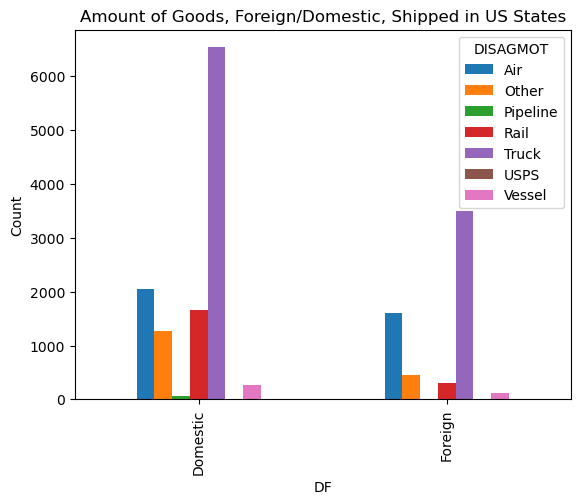

In [46]:
print(pd.crosstab(df['DF'], df['DISAGMOT']))
pd.crosstab(df['DF'], df['DISAGMOT']).plot(kind='bar', ylabel='Count', title='Amount of Goods, Foreign/Domestic, Shipped in US States')
plt.show()

Domestic    1664
Foreign      300
Name: DF, dtype: int64


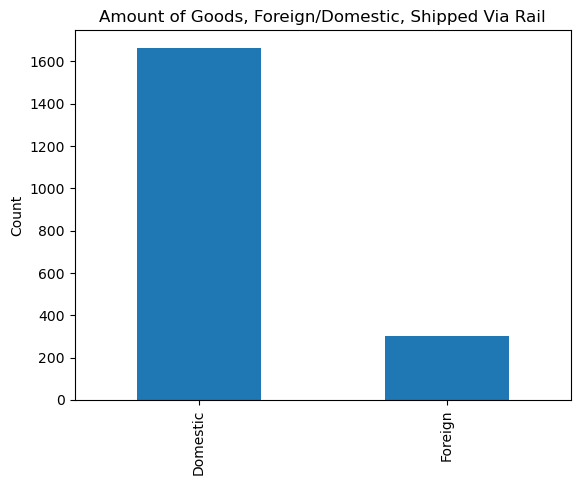

In [47]:
print(df[df.DISAGMOT == 'Rail'].DF.value_counts())
df[df.DISAGMOT == 'Rail'].DF.value_counts().plot(kind='bar', ylabel='Count', title='Amount of Goods, Foreign/Domestic, Shipped Via Rail')
plt.show()

Domestic    0.847251
Foreign     0.152749
Name: DF, dtype: float64


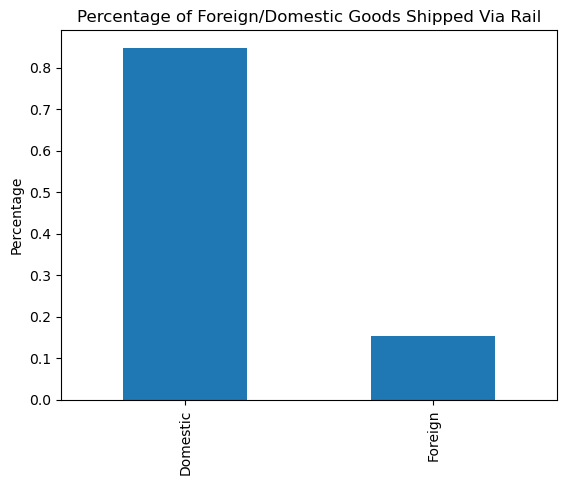

In [48]:
print(df[df.DISAGMOT == 'Rail'].DF.value_counts(normalize=True))
df[df.DISAGMOT == 'Rail'].DF.value_counts(normalize=True).plot(kind='bar', ylabel='Percentage', title='Percentage of Foreign/Domestic Goods Shipped Via Rail')
plt.show()

### Mode of Transportation Code (DISAGMOT)


### Shipping By Rail Per US State

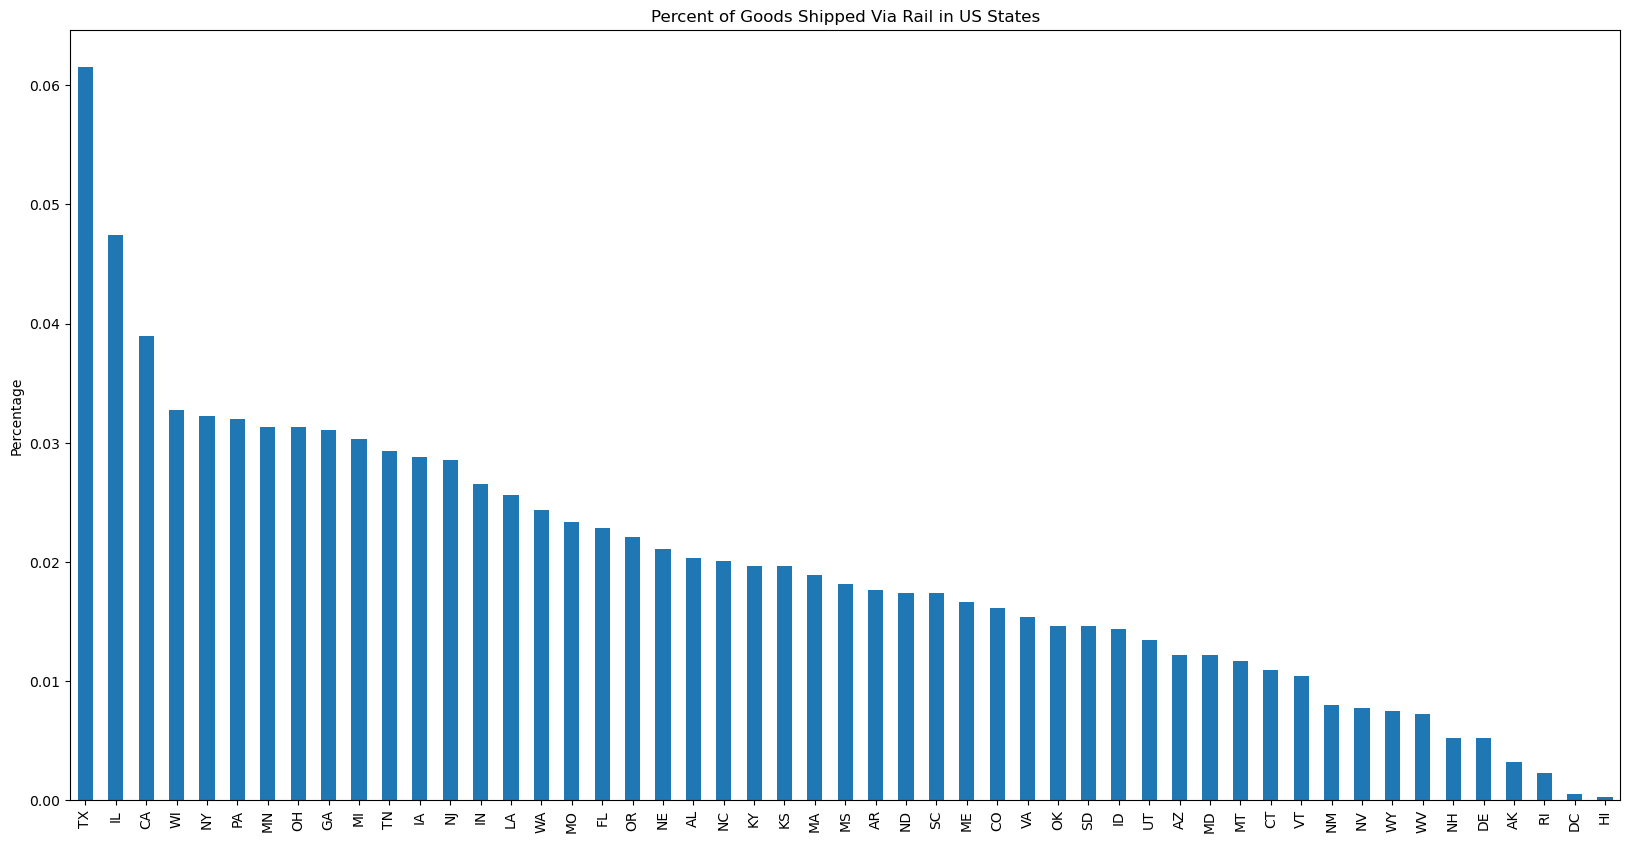

In [35]:
#print(df[df.DISAGMOT == 'Rail'].USASTATE.value_counts(normalize=True))
df[df.DISAGMOT == 'Rail'].USASTATE.value_counts(normalize=True).plot(kind='bar', ylabel='Percentage', figsize=(20,10), title='Percent of Goods Shipped Via Rail in US States')
plt.show()


### Mode of Transportation Code (DISAGMOT)

Truck       15785
Air          5650
Rail         4028
Other        1883
Vessel        920
Pipeline      124
FTZ            78
USPS           18
Name: DISAGMOT, dtype: int64


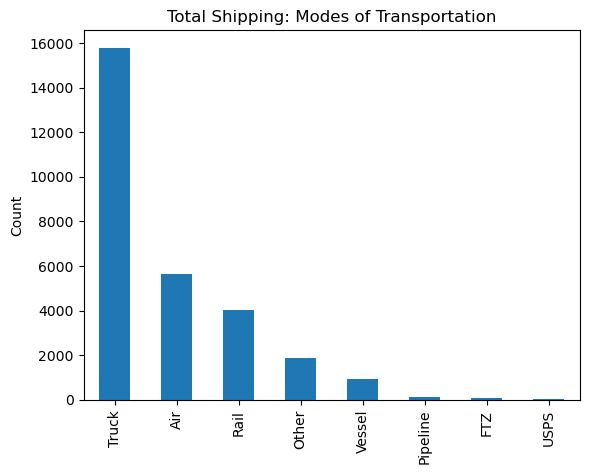

In [36]:
print(df.DISAGMOT.value_counts())
df.DISAGMOT.value_counts().plot(kind='bar', ylabel='Count', title='Total Shipping: Modes of Transportation')
plt.show()

Truck       0.554132
Air         0.198343
Rail        0.141403
Other       0.066103
Vessel      0.032297
Pipeline    0.004353
FTZ         0.002738
USPS        0.000632
Name: DISAGMOT, dtype: float64


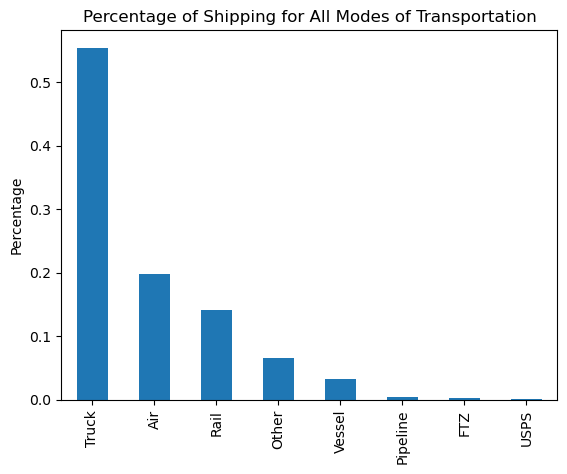

In [37]:
print(df.DISAGMOT.value_counts(normalize=True))
df.DISAGMOT.value_counts(normalize=True).plot(kind='bar', ylabel='Percentage', title='Percentage of Shipping for All Modes of Transportation')
plt.show()

### Percentage of Rail Shipping By Port
### Port/District Code (DEPE): Found Pages 8 - 25

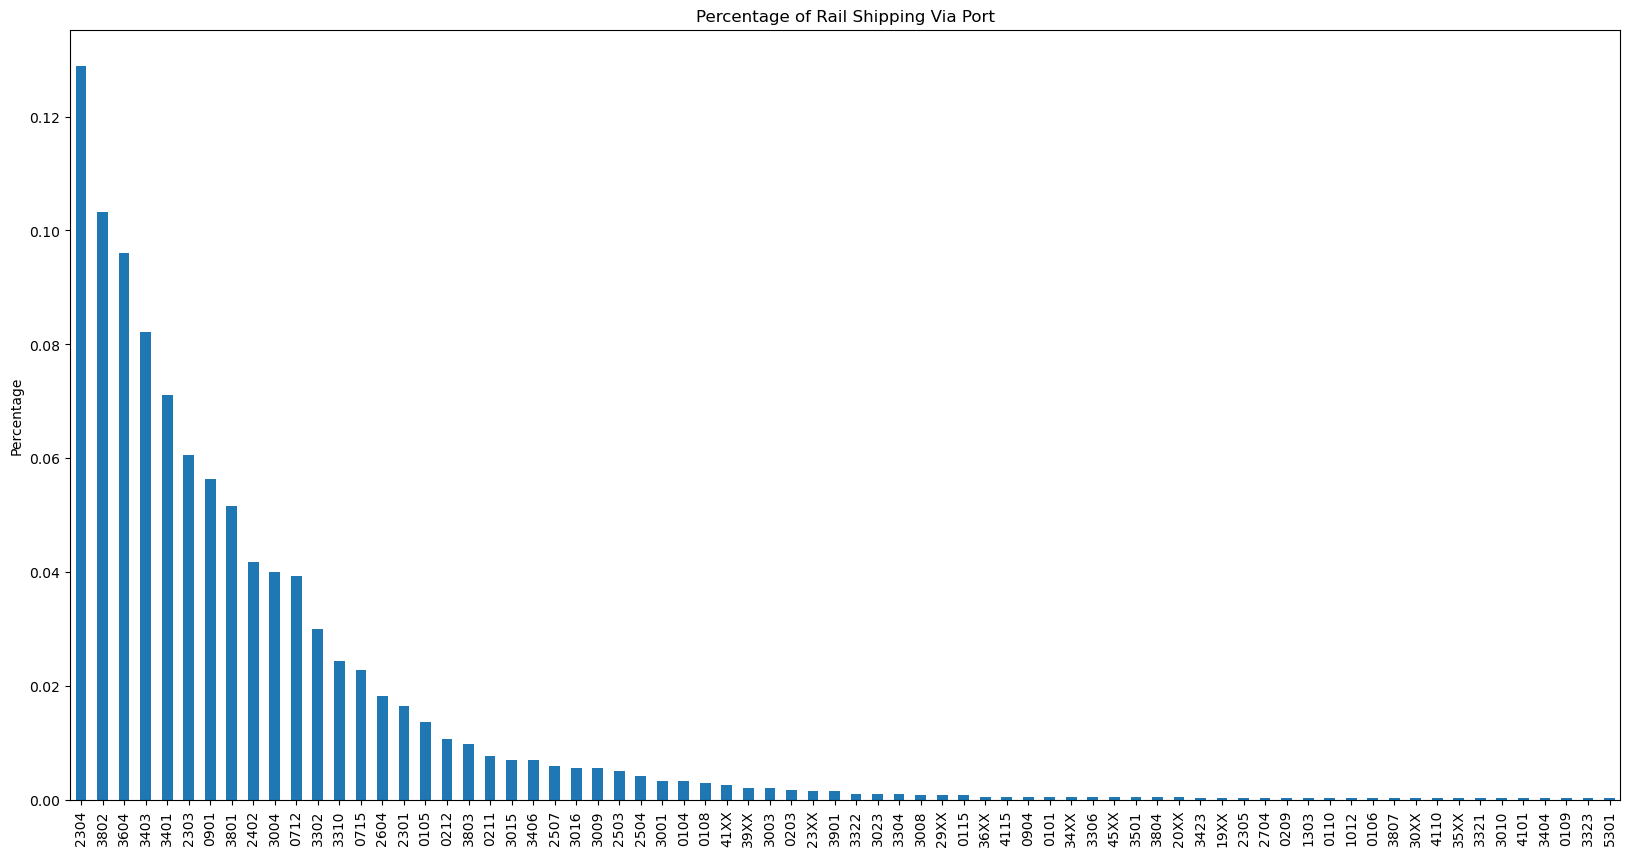

In [38]:
# print(df[df.DISAGMOT == 'Rail'].DEPE.value_counts(normalize=True))
plt.ylabel('Percentage')
df[df.DISAGMOT == 'Rail'].DEPE.value_counts(normalize=True).plot(kind='bar', figsize=(20,10), title='Percentage of Rail Shipping Via Port')
plt.show()